In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [103]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/SUNPHARMA.csv")

In [104]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SUNPHARMA,EQ,1699.10,1800.0,1835.05,1760.0,1835.05,1835.05,1825.90,3024,5.521525e+11,NaN,NaN,NaN
1,2000-01-04,SUNPHARMA,EQ,1835.05,1960.0,1960.00,1763.0,1811.50,1810.45,1805.97,5787,1.045115e+12,NaN,NaN,NaN
2,2000-01-05,SUNPHARMA,EQ,1810.45,1845.0,1845.00,1740.0,1745.00,1746.90,1766.69,6105,1.078564e+12,NaN,NaN,NaN
3,2000-01-06,SUNPHARMA,EQ,1746.90,1750.0,1795.00,1735.0,1748.00,1745.20,1749.32,3472,6.073632e+11,NaN,NaN,NaN
4,2000-01-07,SUNPHARMA,EQ,1745.20,1705.0,1705.00,1605.6,1605.60,1605.60,1621.51,4125,6.688740e+11,NaN,NaN,NaN


In [105]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4778 non-null   float64
 14  %Deliverble         4778 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [106]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.778000e+03,4778.000000
mean,747.503986,748.091887,761.003421,734.275905,747.220307,747.307105,747.717938,2.227251e+06,1.321695e+14,78354.908795,9.994654e+05,0.556243
std,361.700518,362.525350,369.649342,354.184039,361.241519,361.466683,361.615528,5.634408e+06,4.044806e+14,64095.248957,3.445982e+06,0.174570
min,267.400000,266.000000,275.000000,256.000000,264.950000,267.400000,270.120000,2.650000e+02,1.477400e+10,567.000000,3.910000e+02,0.081300
25%,512.662500,514.000000,522.000000,504.550000,512.550000,512.662500,513.467500,7.920475e+04,5.349111e+12,39602.000000,7.045875e+04,0.447000
50%,616.075000,618.275000,626.575000,606.100000,616.000000,616.075000,616.825000,4.253940e+05,3.715205e+13,64567.500000,3.961255e+05,0.577900
75%,881.250000,883.200000,895.000000,866.737500,880.937500,879.912500,880.980000,2.596622e+06,1.747032e+14,97365.250000,1.404886e+06,0.676625
max,2877.000000,2975.000000,3107.000000,2647.000000,2877.200000,2877.000000,2909.160000,2.657094e+08,2.481773e+16,855830.000000,2.163778e+08,1.000000


In [107]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [108]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [109]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [110]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [111]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [112]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [113]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.060222,-1.444099,634.70,6527947,NaN
5302,1.653481,1.035246,639.25,5112384,NaN
5303,1.409995,0.382245,643.40,6069155,NaN
5304,1.700203,-0.685723,644.50,5676290,NaN
5305,4.139978,1.939252,654.45,10874266,NaN


In [114]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [115]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [116]:
#Define the prediction model
model = RandomForestRegressor()

In [117]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9057790043611199


In [119]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [120]:
predictions = model.predict(X_Check)

In [121]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

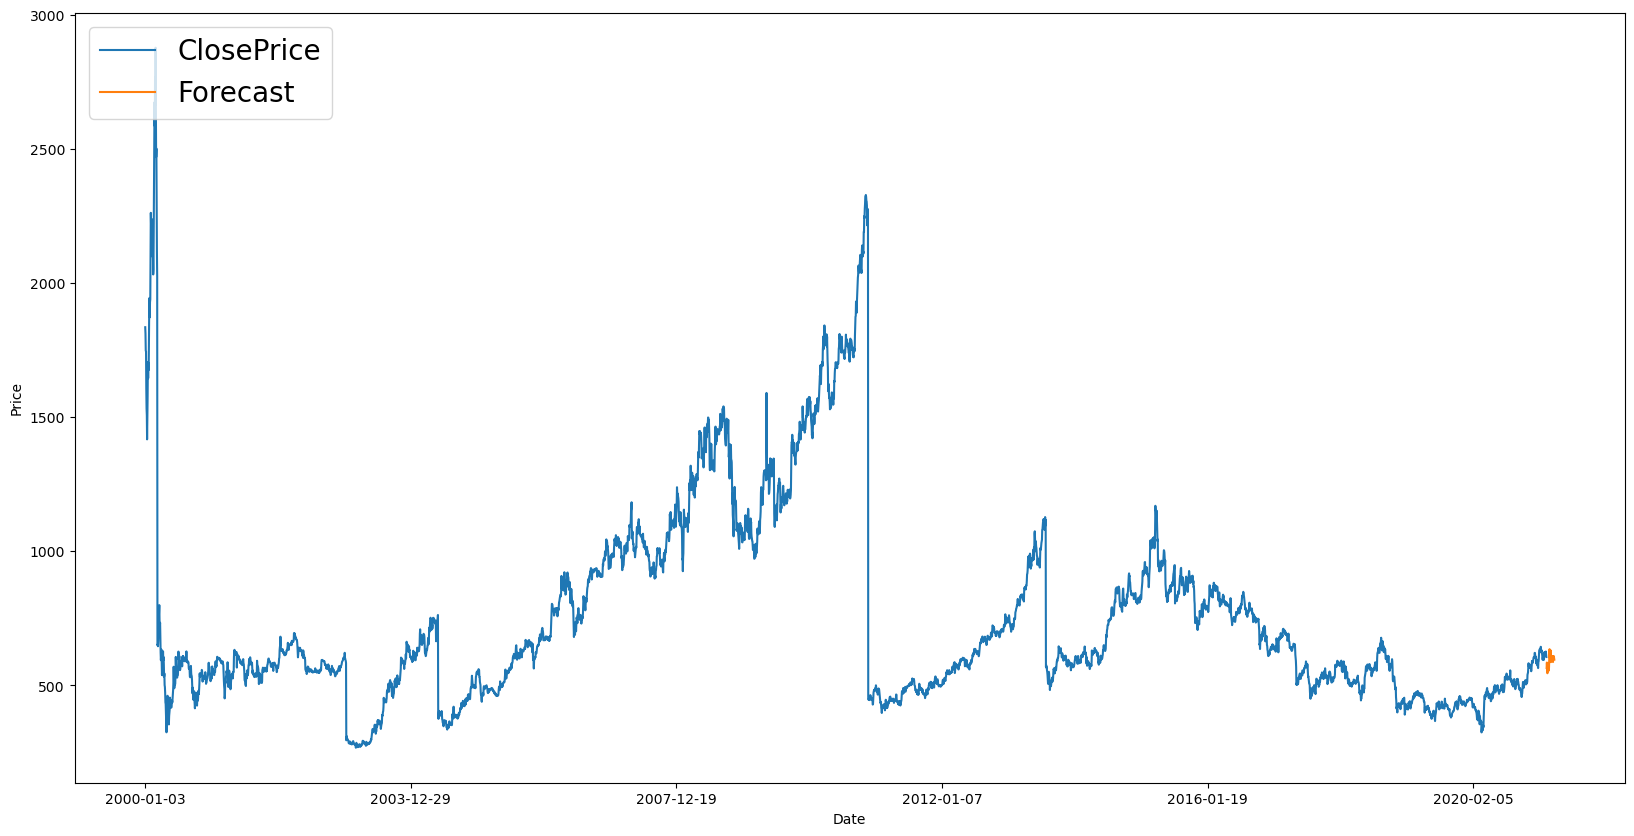

In [122]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')